# Autoencoder
## Transpose Convolution (Deconvolution)
**Reference**
* [Deconvolution](https://analysisbugs.tistory.com/104)

In [4]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

print(input_img.shape)

(None, 28, 28, 1)


In [86]:
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# Encoder
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_4 = Conv2D(2, (3, 3), activation='relu', padding='same')
encode_pool_layer_4 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)
encoded = encode_conv_layer_4(encoded)
encoded = encode_pool_layer_4(encoded)

# Decoder 
decode_conv_layer_1 = Conv2DTranspose(2, (5, 5), padding="same")
decode_conv_layer_1._name = "FIrst"
decode_upsample_layer_1 = UpSampling2D(size=(2, 2), interpolation="nearest")
decode_upsample_layer_1._name = "FirstUP"

decode_conv_layer_2 = Conv2DTranspose(4, (5, 5), padding="same")
decode_conv_layer_2._name = "Second"
decode_upsample_layer_2 = UpSampling2D(size=(2, 2), interpolation="nearest")
decode_upsample_layer_2._name = "SecondUP"

decode_conv_layer_3 = Conv2DTranspose(8, (5, 5), padding="valid")
decode_conv_layer_3._name = "Third"
decode_upsample_layer_3 = UpSampling2D(size=(2, 2), interpolation="nearest")
decode_upsample_layer_3._name = "ThirdUP"

decode_conv_layer_4 = Conv2DTranspose(16, (5, 5 ), padding="valid")
decode_upsample_layer_4 = UpSampling2D(size=(2, 2), interpolation="nearest")
decode_conv_layer_5 = Conv2DTranspose(1, (3, 3), padding="same")

decoded = decode_conv_layer_1(encoded) 
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)
decoded = decode_conv_layer_5(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_86 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_332 (Conv2D)         (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_332 (MaxPooli  (None, 14, 14, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_333 (Conv2D)         (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_333 (MaxPooli  (None, 7, 7, 8)          0         
 ng2D)                                                           
                                                                 
 conv2d_334 (Conv2D)         (None, 7, 7, 4)           292

In [88]:
autoencoder.fit(x_train, x_train)

1875/1875 [==============================] - 46s 23ms/step - loss: 0.2485


1/1 [==============================] - 0s 21ms/step


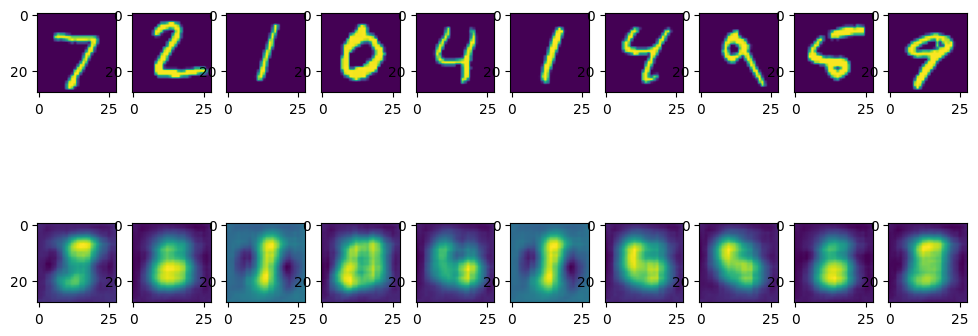

In [90]:
plt.figure(figsize=(12,5))

original = x_test[:10]
generated = autoencoder.predict(original)    # AutoEncoder 모델의 이미지 복원생성
original = original.reshape(-1, 28, 28)
generated = generated.reshape(-1, 28, 28)

for i in range(10):  
    # 원본 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(original[i])

    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(generated[i])